In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(99)

In [3]:
%run ./Lorenz_data.ipynb
%run ./ESN.ipynb
%run ./Reconstruct.ipynb

N_washout = 100
N_train   = 10000
N_tstart  = 10000
N_test    = 2000

In [4]:
%run ./GC_TE_CCM.ipynb

In [5]:
def gen_X_p(N_x, percentage, sigma_dyn = 1e-4, sigma_obs = 1e-4):
    """
    Generate data based on the number of nodes and the possibility of generating edges
    Half of the percentage are used for producing a_i,j = 1
    """
    rand = np.random.rand(N_x, N_x)
    A1 = (np.array(rand < (percentage / 2)).astype(int) + np.array(rand < percentage).astype(int)) / 2
    for i in range(N_x):
        A1[i,i] = 0

    if np.sum(A1==0) <= N_x:
        A1i, A1j = np.random.choice(N, 2, replace=False)
        A1[A1i, A1j] = 0
    if np.sum(A1==0.5) <= 0:
        A1i, A1j = np.random.choice(N, 2, replace=False)
        A1[A1i, A1j] = 0.5
    if np.sum(A1==1) <= 0:
        A1i, A1j = np.random.choice(N, 2, replace=False)
        A1[A1i, A1j] = 1

    X = gen_data_norm(N_x, A1, N_tstart+N_test, sigma_dyn = sigma_dyn, sigma_obs = sigma_obs)
    return X, A1

In [6]:
# network size
N_xs = [5,10,20]

# Probability of generating an edge
percentages = [0.5, 0.4, 0.25]

Array_to_plot = [[],[],[],[],[]]
labels=['IRC','GC','TE','CCM']
for nx in range(len(N_xs)):
    N_x = N_xs[nx]
    p = percentages[nx]
    
    X, A = gen_X_p(N_x, p)
    Array_to_plot[0].append(A)

    # washout
    X_washout = X[:N_washout]
    # training
    X_t = X[N_washout:N_washout+N_train-1]
    Y_t = X[N_washout+1:N_washout+N_train]

    X_test = X[N_tstart:]
    N_dim   = 3 * N_x # dimension of inputs (and outputs)
    N_units = 100 * N_dim #units in the reservoir 

    N_net = 5
    TDInet = []

    N_rep, N_evo = 20, 10

    for net in range(N_net):
        esn = ESN(N_units, N_dim, N_dim)
        esn.train(X_washout, X_t, Y_t)

        TDInet.append(cal_TDI(esn, X_test, N_x, 3, 0, 1, N_rep, N_washout, N_evo))

    TDI = np.mean(np.array(TDInet), axis=0)
    Array_to_plot[1].append(TDI)
    
    Array_GC = cal_ArrayGC(X, N_x)
    Array_to_plot[2].append(Array_GC)
    
    Array_TE = cal_ArrayTE(X, N_x)
    Array_to_plot[3].append(Array_TE)

    Array_CCM = cal_ArrayCCM(X, N_x)
    Array_to_plot[4].append(Array_CCM)

In [22]:
%run ./Plot_TDI.ipynb

pos:8, neg:12
0.0013950692446304998 0.00010762265519203467
pos:33, neg:57
0.0006123038305609872 0.00014121957331247786
pos:85, neg:295
0.00036845632398667605 0.0001429815578105828


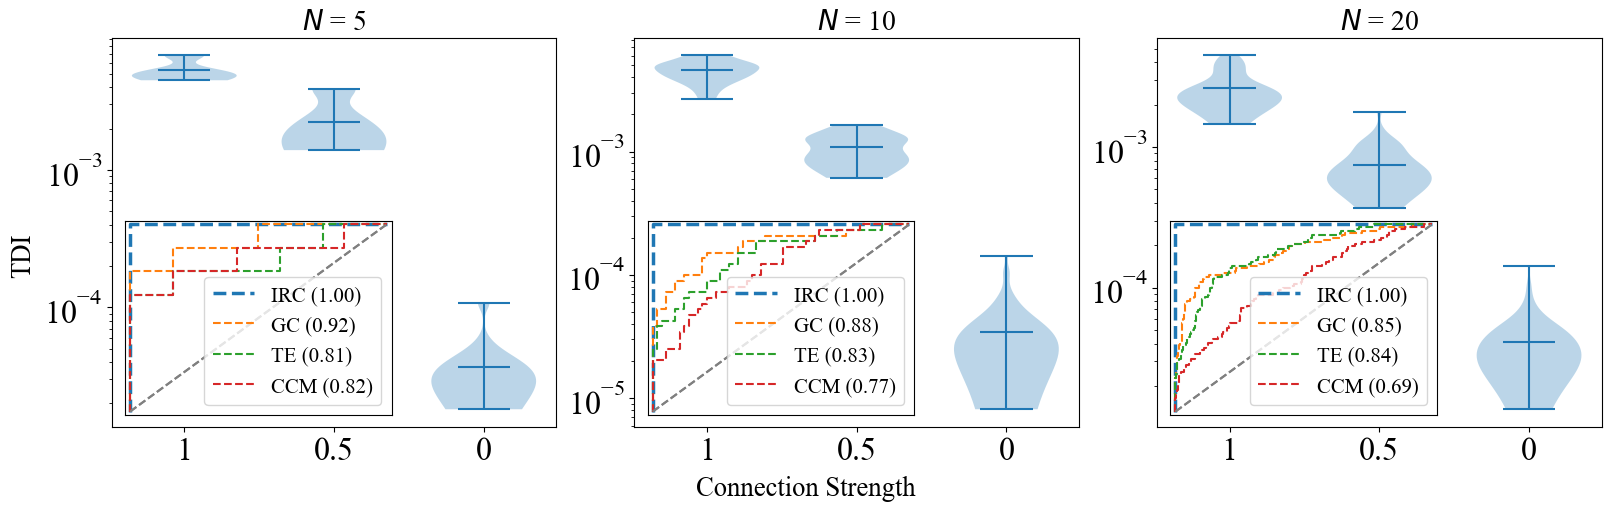

In [23]:
plot_TDI_ROC_multi(Array_to_plot, labels, [1,0.5,0], N_xs)

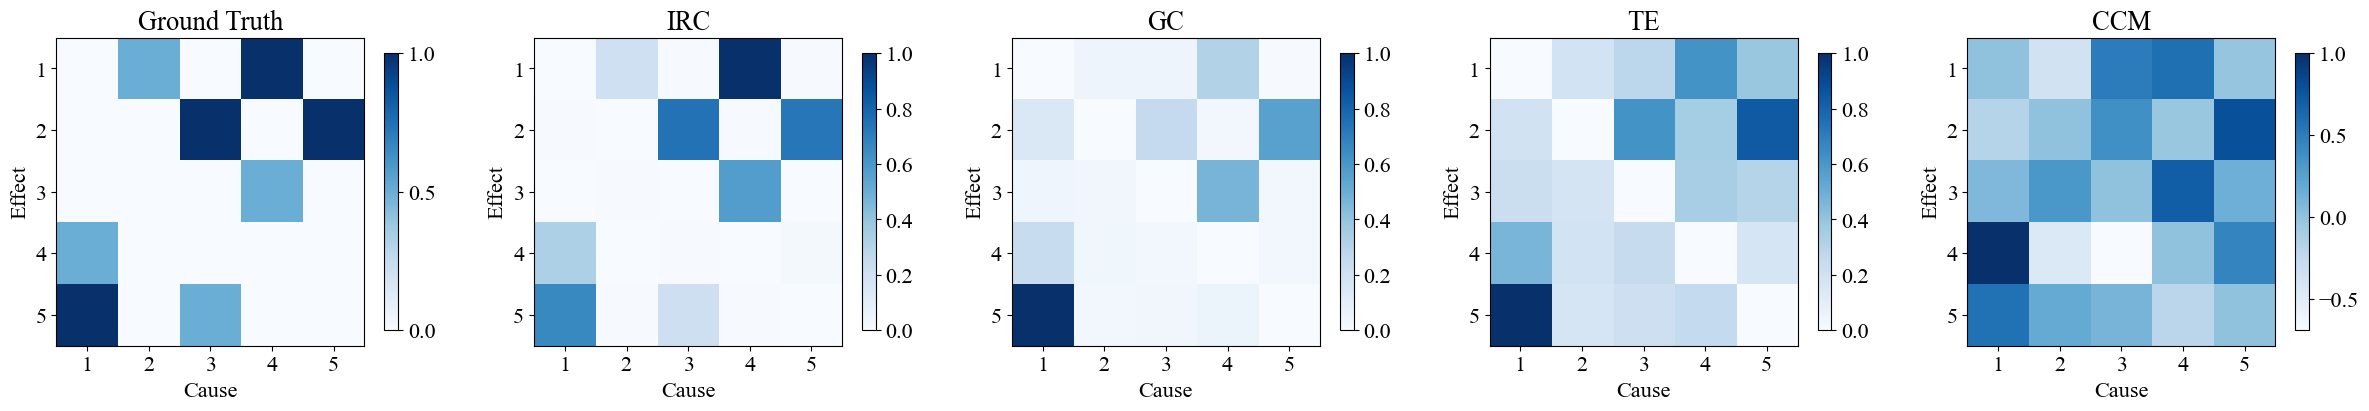

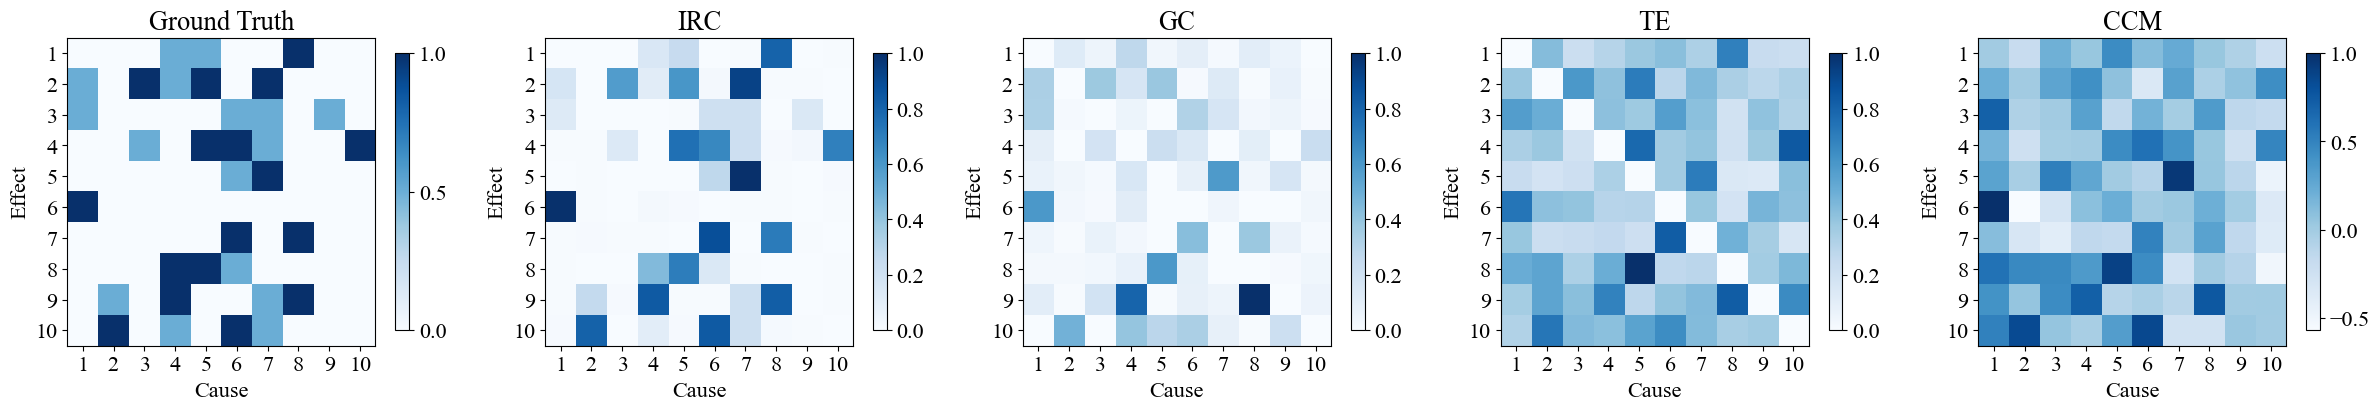

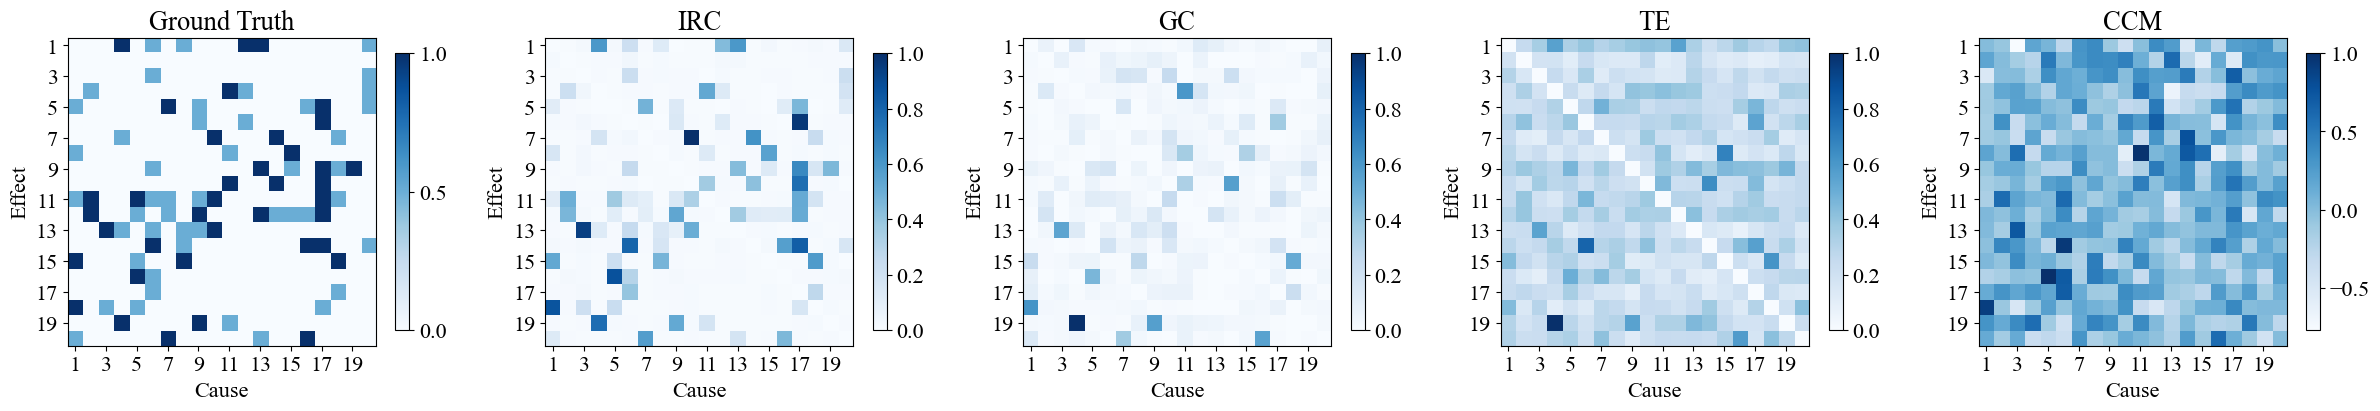

In [9]:
titles = ['Ground Truth','IRC','GC','TE','CCM']
for i in range(len(N_xs)):
    N_x = N_xs[i]
    variables = np.arange(1, N_x+1, 1)
    seq = np.arange(0, N_x, math.ceil(N_x / 10))
    
    
    plot_array_1x5([Array_to_plot[0][i], Array_to_plot[1][i], Array_to_plot[2][i], Array_to_plot[3][i], Array_to_plot[4][i]], titles, variables, seq)

In [10]:
# Data for visualization

print('Source,Target,Weight')
for i in range(20):
    for j in range(20):
        if Array_to_plot[0][-1][i][j] > 0:
            print(f'{j},{i},{Array_to_plot[0][-1][i][j]}')

Source,Target,Weight
3,0,1.0
5,0,0.5
7,0,0.5
11,0,1.0
12,0,1.0
19,0,0.5
5,2,0.5
19,2,0.5
1,3,0.5
10,3,1.0
11,3,0.5
19,3,0.5
0,4,0.5
6,4,1.0
8,4,0.5
15,4,0.5
16,4,1.0
19,4,0.5
8,5,0.5
11,5,0.5
16,5,1.0
3,6,0.5
9,6,1.0
13,6,1.0
17,6,0.5
0,7,0.5
10,7,0.5
14,7,1.0
5,8,0.5
12,8,1.0
14,8,0.5
16,8,1.0
17,8,0.5
18,8,1.0
10,9,1.0
13,9,1.0
16,9,1.0
0,10,0.5
1,10,1.0
4,10,1.0
5,10,0.5
6,10,0.5
8,10,0.5
9,10,1.0
16,10,1.0
17,10,0.5
1,11,1.0
4,11,0.5
6,11,0.5
8,11,1.0
12,11,1.0
13,11,0.5
14,11,0.5
15,11,0.5
16,11,1.0
2,12,1.0
3,12,0.5
5,12,0.5
7,12,0.5
8,12,0.5
9,12,1.0
5,13,1.0
7,13,0.5
15,13,1.0
16,13,1.0
19,13,0.5
0,14,1.0
4,14,0.5
7,14,1.0
17,14,1.0
4,15,1.0
5,15,0.5
5,16,0.5
17,16,0.5
0,17,1.0
2,17,0.5
4,17,0.5
16,17,0.5
3,18,1.0
8,18,1.0
10,18,0.5
0,19,0.5
6,19,1.0
12,19,0.5
15,19,1.0
